In [1]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
# Define the parameters for the HOG feature extraction
orientations = 9
pixels_per_cell = (2, 2)
cells_per_block = (1, 1)
flatten = True

In [3]:
# Define the paths to the train and test image directories
train_dir_deer = "Dear/"
train_dir_nondeer="NonDear/"
test_dir = "deer-test"

In [4]:
# Load the training images and extract HOG features for each image
train_features = []
train_labels = []

for i in os.listdir(train_dir_deer):
    class_label=1
    image=cv2.imread(train_dir_deer+i,0)
    image=cv2.resize(image,(64,64))
    #features = hog(image,feature_vector=flatten)
    features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,cells_per_block=cells_per_block, feature_vector=flatten)
    train_features.append(features)
    train_labels.append(class_label)


In [5]:
flag=True
for i in os.listdir(train_dir_nondeer):
    class_label=0
    image=cv2.imread(train_dir_nondeer+i,0)
    image=cv2.resize(image,(64,64))
    #features = hog(image,feature_vector=flatten)
    features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,cells_per_block=cells_per_block, feature_vector=flatten)
    if flag==True:
        print(features.shape)
        flag=False
    train_features.append(features)
    train_labels.append(class_label)

(9216,)


In [6]:
svm = SVC(kernel='linear')
svm.fit(train_features, train_labels)

SVC(kernel='linear')

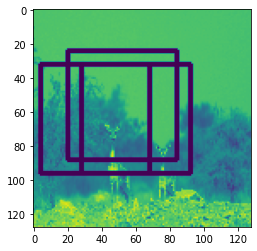

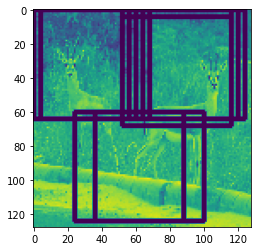

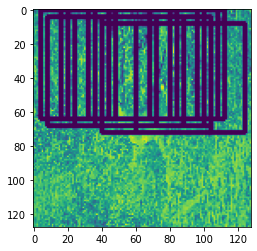

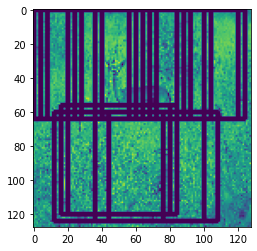

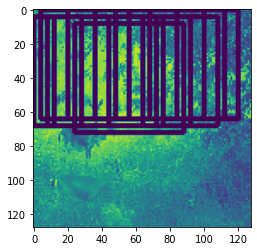

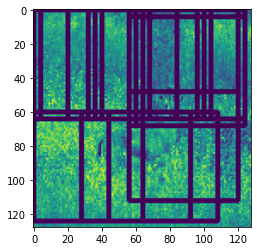

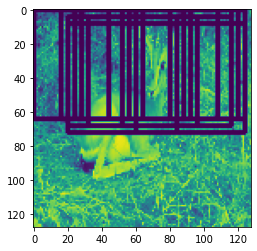

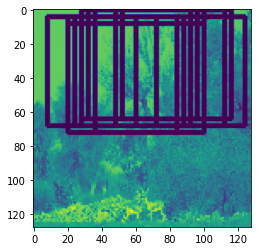

In [8]:




# Load the test images and perform sliding window object detection
for image_file in os.listdir(test_dir):
    image = cv2.imread(os.path.join(test_dir, image_file),0)
    image=cv2.resize(image,(128,128))
    (winW, winH) = (64, 64)  # window size
    stepSize = 4  # step size
    (h, w) = image.shape[:2]

    # Slide a window over the image
    for y in range(0, h - winH, stepSize):
        for x in range(0, w - winW, stepSize):
            # Extract the window and compute its HOG features
            window = image[y:y + winH, x:x + winW]
            features = hog(window, orientations=orientations, pixels_per_cell=pixels_per_cell,
                            cells_per_block=cells_per_block, feature_vector=flatten)
            # Classify the window using the trained SVM classifier
            # print(features.shape)
            # print(features.ndim)
            # features = features.reshape(22500)
            prediction = svm.predict([features])[0]
            # If the window contains a deer, draw a bounding box around it
            if prediction == 1:
                cv2.rectangle(image, (x, y), (x + winW, y + winH), (0, 255, 0), 2)

    # Display the image with bounding boxes around detected deer
    plt.imshow(image)
    plt.show()
